#data

In [ ]:
# Węzły to użytkownicy LastFM z krajów azjatyckich, a krawędzie to wzajemne relacje obserwowania między nimi.
# Każdy z węzłów ma przypisaną etykietę oznaczającą kraj użytkownika.
# Cechy wierzchołków są wydobywane na podstawie artystów lubianych przez użytkowników.
# Klasyfikacja węzłów - trzeba przewidzieć lokalizację użytkowników.
# Można wprowadzić utrudnienia - dostęp tylko do krawędzi lub cech.
!wget https://snap.stanford.edu/data/lastfm_asia.zip
!unzip lastfm_asia.zip

--2023-05-18 16:15:39--  https://snap.stanford.edu/data/lastfm_asia.zip
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6527202 (6.2M) [application/zip]
Saving to: ‘lastfm_asia.zip.5’

lastfm_asia.zip.5   100%[===================>]   6.22M  2.89MB/s    in 2.2s    

2023-05-18 16:15:41 (2.89 MB/s) - ‘lastfm_asia.zip.5’ saved [6527202/6527202]

Archive:  lastfm_asia.zip
replace lasftm_asia/lastfm_asia_edges.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# read features
with open('/content/lasftm_asia/lastfm_asia_features.json', 'r') as f:
    js = json.load(f)

# convert to pandas 
features_df = pd.DataFrame.from_dict(js, orient='index')

print(f"num of nodes: {len(js.keys())}")
print(f"num of unique features: {len(np.unique(features_df.values.flatten()))}")
print(f"max num of features per node: {features_df.shape[1]}")

num of nodes: 7624
num of unique features: 7843
max num of features per node: 944


In [ ]:
# read nodes and edges
nodes_df = pd.read_csv('/content/lasftm_asia/lastfm_asia_target.csv')
edges_df = pd.read_csv('/content/lasftm_asia/lastfm_asia_edges.csv')

print(f"num of nodes: {nodes_df['id'].nunique()}")
print(f"num of labels: {nodes_df['target'].nunique()}")

print("\nnodes:")
print(nodes_df.head())
print(nodes_df.shape)

print("\nedges:")
print(edges_df.head())
print(edges_df.shape)

num of nodes: 7624
num of labels: 18

nodes:
   id  target
0   0       8
1   1      17
2   2       3
3   3      17
4   4       5
(7624, 2)

edges:
   node_1  node_2
0       0     747
1       1    4257
2       1    2194
3       1     580
4       1    6478
(27806, 2)


# networkx

In [ ]:
import pandas as pd
import networkx as nx

# Create an empty graph
graph = nx.Graph()

# Add nodes to the graph
for _, row in nodes_df.iterrows():
    node_id = row['id']
    label = row['target']
    graph.add_node(node_id, label=label)

# Add edges to the graph
for _, row in edges_df.iterrows():
    node_1 = row['node_1']
    node_2 = row['node_2']
    graph.add_edge(node_1, node_2)

# Perform basic analysis
num_nodes = graph.number_of_nodes()
num_edges = graph.number_of_edges()
degrees = [degree for _, degree in graph.degree()]
average_degree = sum(degrees) / num_nodes
components = nx.connected_components(graph)
num_components = nx.number_connected_components(graph)

# Print the results
print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)
print("Average degree:", average_degree)
print("Number of connected components:", num_components)

Number of nodes: 7624
Number of edges: 27806
Average degree: 7.2943336831059815
Number of connected components: 1


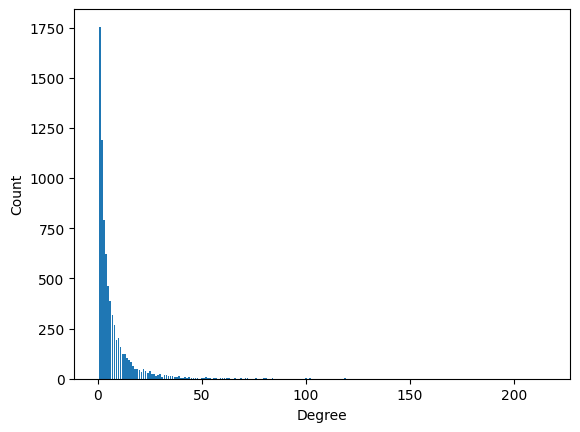

In [ ]:
import matplotlib.pyplot as plt

degree_sequence = [degree for _, degree in graph.degree()]
degree_counts = nx.degree_histogram(graph)

# Plot degree distribution
plt.bar(range(len(degree_counts)), degree_counts)
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()

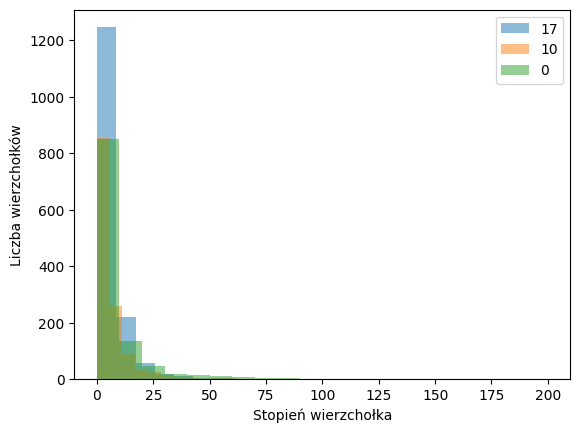

In [ ]:
# Tworzenie grafu
G = nx.Graph()

# Dodawanie węzłów do grafu
for _, node in nodes_df.iterrows():
    G.add_node(node["id"], target=node["target"])

# Dodawanie krawędzi do grafu
for _, edge in edges_df.iterrows():
    G.add_edge(edge["node_1"], edge["node_2"])

# Tworzenie histogramu stopni wierzchołków dla trzech najliczniejszych klas "target"
target_counts = nodes_df["target"].value_counts().head(3)
target_classes = target_counts.index.tolist()

degree_histograms = {}

for target_class in target_classes:
    nodes_in_class = nodes_df[nodes_df["target"] == target_class]["id"].tolist()
    subgraph = G.subgraph(nodes_in_class)
    degrees = [degree for _, degree in subgraph.degree()]
    degree_histograms[target_class] = degrees

# Wykres histogramu stopni wierzchołków
for target_class, degrees in degree_histograms.items():
    plt.hist(degrees, bins=20, alpha=0.5, label=target_class)

plt.xlabel("Stopień wierzchołka")
plt.ylabel("Liczba wierzchołków")
plt.legend()
plt.show()

In [ ]:
# Tworzenie grafu
G = nx.Graph()

# Dodawanie węzłów do grafu
for _, node in nodes_df.iterrows():
    G.add_node(node["id"], target=node["target"])

# Dodawanie krawędzi do grafu
for _, edge in edges_df.iterrows():
    G.add_edge(edge["node_1"], edge["node_2"])

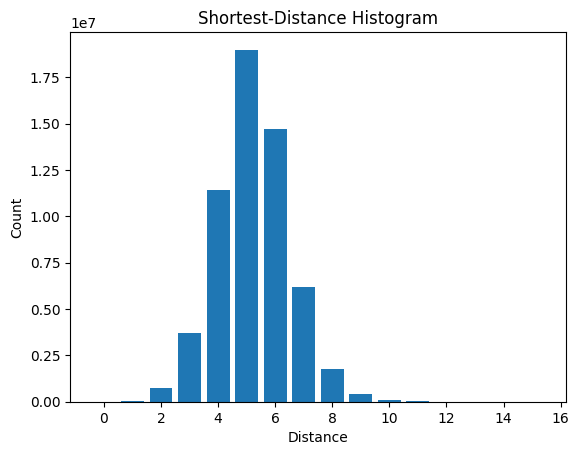

In [ ]:


# Compute the shortest distances for all vertex pairs
distances = dict(nx.all_pairs_shortest_path_length(G))

# Compute the histogram of shortest distances
histogram = {}
for _, dist_dict in distances.items():
    for dist in dist_dict.values():
        if dist in histogram:
            histogram[dist] += 1
        else:
            histogram[dist] = 1

# Sort the histogram by distance
sorted_histogram = sorted(histogram.items())

if sorted_histogram:
    # Extract the distances and counts for plotting
    distances, counts = zip(*sorted_histogram)

    # Plot the histogram
    plt.bar(distances, counts)
    plt.xlabel("Distance")
    plt.ylabel("Count")
    plt.title("Shortest-Distance Histogram")
    plt.show()
else:
    print("No shortest distances computed. The graph may be empty or disconnected.")

In [ ]:
# Calculate the average degree
average_degree = nx.average_degree_connectivity(G)

print("Average Degree:", average_degree)

Average Degree: {1: 25.909920182440136, 10: 22.95369458128079, 7: 23.330637915543576, 18: 23.997635933806148, 20: 27.057142857142857, 8: 22.68148148148148, 5: 23.992672413793102, 2: 22.11952861952862, 29: 28.649087221095336, 4: 21.179321486268176, 34: 27.223039215686274, 24: 26.372222222222224, 6: 22.23246753246753, 3: 21.08470290771176, 13: 25.92749054224464, 21: 29.147186147186147, 12: 25.80149051490515, 28: 31.042410714285715, 9: 22.894645941278064, 14: 26.600274725274726, 17: 27.268778280542985, 89: 25.224719101123597, 45: 33.2, 44: 28.613636363636363, 26: 23.759615384615383, 11: 24.41542002301496, 19: 24.272311212814646, 15: 26.682608695652174, 23: 28.37955346650999, 37: 31.105405405405406, 16: 26.89429012345679, 51: 29.662745098039217, 47: 27.19858156028369, 25: 31.433684210526316, 39: 30.128205128205128, 22: 25.463438735177867, 33: 26.98181818181818, 104: 29.346153846153847, 69: 32.91787439613527, 54: 34.96296296296296, 30: 27.637878787878787, 46: 30.860869565217392, 172: 17.087

In [ ]:
# Centralność węzłów
degree_centrality = nx.degree_centrality(graph)

# Wypisanie węzłów z najwyższymi wartościami centralności
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

print("Węzły z najwyższą centralnością stopnia:")
for node, centrality in top_degree:
    print("Węzeł:", node, "Centralność stopnia:", centrality)

Węzły z najwyższą centralnością stopnia:
Węzeł: 7237 Centralność stopnia: 0.02833530106257379
Węzeł: 3530 Centralność stopnia: 0.022956841138659322
Węzeł: 4785 Centralność stopnia: 0.022825659189295553
Węzeł: 524 Centralność stopnia: 0.022563295290568018
Węzeł: 3450 Centralność stopnia: 0.02085792994883904


<ipython-input-8-ec8f734b3bfe>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(nodes, rotation=90)  # Rotate x-axis labels for better visibility


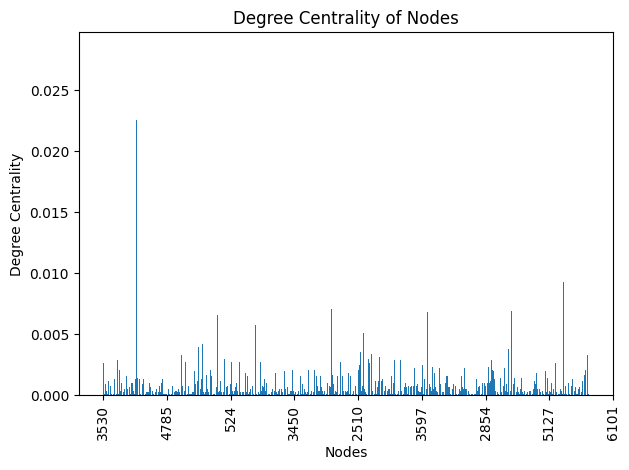

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Calculate the degree centrality of nodes in the graph
degree_centrality = nx.degree_centrality(G)

# Sort the nodes based on their degree centrality values
sorted_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

# Extract the node names and centrality values for plotting
nodes = [node for node, centrality in sorted_nodes]
centrality_values = [centrality for node, centrality in sorted_nodes]

# Create the bar plot
fig, ax = plt.subplots()
ax.bar(nodes, centrality_values)
ax.set_xlabel('Nodes')
ax.set_ylabel('Degree Centrality')
ax.set_title('Degree Centrality of Nodes')
ax.set_xticklabels(nodes, rotation=90)  # Rotate x-axis labels for better visibility

fig.set_facecolor('w')
plt.tight_layout()
plt.show()

In [ ]:
from networkx.algorithms.community import greedy_modularity_communities

# Wykrywanie społeczności za pomocą algorytmu Louvain
communities = greedy_modularity_communities(graph)

In [ ]:
# Wyświetlanie społeczności wraz z przynależnymi węzłami
for comm_id, nodes in enumerate(communities):
    print("Społeczność", comm_id,": ", len(nodes))
    # for node in nodes:
    #     print("Węzeł:", node)

Społeczność 0 :  1518
Społeczność 1 :  1420
Społeczność 2 :  1072
Społeczność 3 :  991
Społeczność 4 :  679
Społeczność 5 :  661
Społeczność 6 :  484
Społeczność 7 :  153
Społeczność 8 :  145
Społeczność 9 :  102
Społeczność 10 :  75
Społeczność 11 :  56
Społeczność 12 :  45
Społeczność 13 :  29
Społeczność 14 :  25
Społeczność 15 :  13
Społeczność 16 :  11
Społeczność 17 :  11
Społeczność 18 :  11
Społeczność 19 :  10
Społeczność 20 :  9
Społeczność 21 :  8
Społeczność 22 :  7
Społeczność 23 :  7
Społeczność 24 :  6
Społeczność 25 :  6
Społeczność 26 :  6
Społeczność 27 :  6
Społeczność 28 :  5
Społeczność 29 :  5
Społeczność 30 :  5
Społeczność 31 :  5
Społeczność 32 :  4
Społeczność 33 :  4
Społeczność 34 :  4
Społeczność 35 :  4
Społeczność 36 :  4
Społeczność 37 :  3
Społeczność 38 :  3
Społeczność 39 :  3
Społeczność 40 :  3
Społeczność 41 :  3
Społeczność 42 :  3


# top 3

In [ ]:
top_classes = list(nodes_df['target'].value_counts().head(3).index)

subgraph_nodes = nodes_df[nodes_df['target'].isin(top_classes)]
subgraph_edges = edges_df[edges_df['node_1'].isin(subgraph_nodes['id']) & edges_df['node_2'].isin(subgraph_nodes['id'])]

subgraph = nx.from_pandas_edgelist(subgraph_edges, 'node_1', 'node_2')

num_nodes = len(subgraph.nodes)
num_edges = len(subgraph.edges)
average_degree = sum(dict(subgraph.degree()).values()) / num_nodes
components = nx.connected_components(subgraph)
num_components = nx.number_connected_components(subgraph)

print("Liczba węzłów:", num_nodes)
print("Liczba krawędzi:", num_edges)
print("Średni stopień wierzchołka:", average_degree)
print("Liczba składowych spójnych:", num_components)


Liczba węzłów: 3843
Liczba krawędzi: 13835
Średni stopień wierzchołka: 7.200104085349987
Liczba składowych spójnych: 18


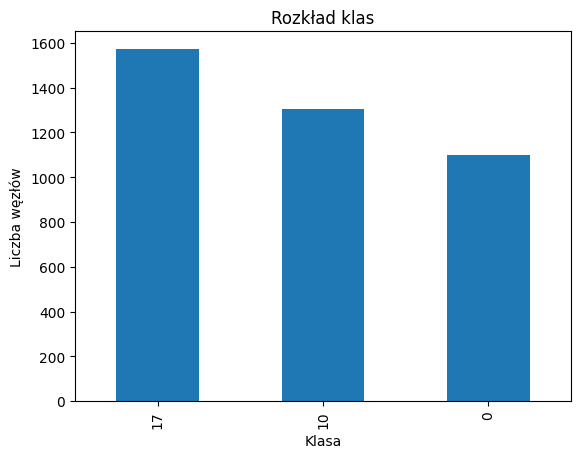

In [ ]:
# 1. Rozkład klas
class_counts = subgraph_nodes['target'].value_counts()
class_counts.plot(kind='bar')
plt.xlabel('Klasa')
plt.ylabel('Liczba węzłów')
plt.title('Rozkład klas')
plt.show()

In [ ]:
# 2. Stopień wierzchołków
# avg_degree_by_class = subgraph_nodes.groupby('target').apply(lambda x: np.mean(list(subgraph.subgraph(x['id']).degree())))
# print('Średni stopień wierzchołków dla poszczególnych klas:')
# print(avg_degree_by_class)

Średni stopień wierzchołków dla poszczególnych klas:
target
0     1856.810393
10    1913.093354
17    1896.720715
dtype: float64


In [ ]:
# 3. Współczynnik klastrowania
clustering_by_class = nx.clustering(subgraph)
avg_clustering_by_class = subgraph_nodes.groupby('target').apply(lambda x: np.mean([clustering_by_class[node] for node in x['id'] if node in clustering_by_class]))
print('Średni współczynnik klastrowania dla poszczególnych klas:')
print(avg_clustering_by_class)

Średni współczynnik klastrowania dla poszczególnych klas:
target
0     0.240550
10    0.233860
17    0.168278
dtype: float64


In [ ]:
# 4. Centralność węzłów
betweenness_by_class = nx.betweenness_centrality(subgraph)
avg_betweenness_by_class = subgraph_nodes.groupby('target').apply(lambda x: np.mean([betweenness_by_class[node] for node in x['id'] if node in betweenness_by_class]))
print('Średnia centralność pośrednictwa dla poszczególnych klas:')
print(avg_betweenness_by_class)

Średnia centralność pośrednictwa dla poszczególnych klas:
target
0     0.001028
10    0.001015
17    0.001047
dtype: float64


In [ ]:
# 5. Wspólnoty społeczności
communities_by_class = nx.algorithms.community.label_propagation.label_propagation_communities(subgraph)
print('Wspólnoty społeczności dla poszczególnych klas:')
for i, community in enumerate(communities_by_class):
    if i < 3:
        print(f'Klasa {top_classes[i]}, liczba wierzchołków: {len(community)}')

Wspólnoty społeczności dla poszczególnych klas:
Klasa 17, liczba wierzchołków: 375
Klasa 10, liczba wierzchołków: 29
Klasa 0, liczba wierzchołków: 867


In [ ]:
# 6. Centrum społeczności
center_nodes_by_class = subgraph_nodes.groupby('target').apply(lambda x: nx.center(subgraph.subgraph(x['id'])) if nx.is_connected(subgraph.subgraph(x['id'])) else [])
print('Centrum społeczności dla poszczególnych klas:')
print(center_nodes_by_class)

Centrum społeczności dla poszczególnych klas:
target
0     []
10    []
17    []
dtype: object


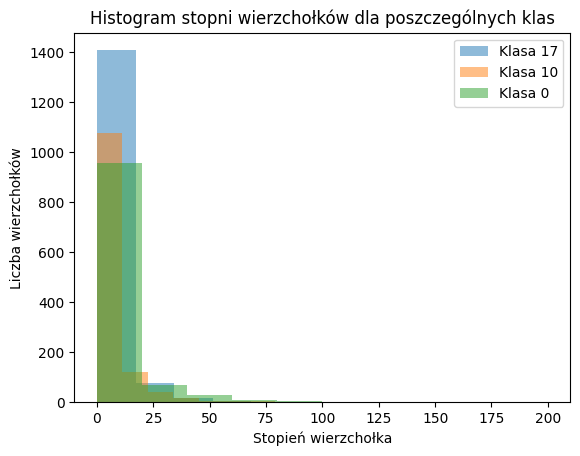

In [ ]:
# Histogram stopni wierzchołków dla poszczególnych klas
plt.figure()
for label in top_classes:
    nodes_in_class = subgraph_nodes[subgraph_nodes['target'] == label]['id']
    subgraph_class = subgraph.subgraph(nodes_in_class)
    degrees = [subgraph_class.degree(node) for node in subgraph_class.nodes()]
    plt.hist(degrees, bins=10, alpha=0.5, label=f'Klasa {label}')
plt.xlabel('Stopień wierzchołka')
plt.ylabel('Liczba wierzchołków')
plt.legend()
plt.title('Histogram stopni wierzchołków dla poszczególnych klas')
plt.show()

# data matrix

In [ ]:
# replace NaN values with -1
features_df.fillna(value=-1, inplace=True)

# create binary feature matrix
num_nodes = features_df.shape[0]
num_features = len(np.unique(features_df.values.flatten())) + 1 # assuming the feature indices start at 0
binary_features = np.zeros((num_nodes, num_features), dtype=int)

for i in range(num_nodes):
    # get the features for the current node
    node_features = features_df.iloc[i].values
    
    # set the values in the corresponding columns to 1
    binary_features[i, node_features.astype(int)] = 1

print(f"num of nodes: {binary_features.shape[0]}")
print(f"num of features: {binary_features.shape[1]}")

num of nodes: 7624
num of features: 7844


In [ ]:
# extract node IDs and target labels
node_ids = nodes_df['id'].values
labels = nodes_df['target'].values

# initialize numpy arrays with zeros
num_nodes = node_ids.shape[0]
binary_edges = np.zeros((num_nodes, num_nodes), dtype=int)

# set features to 1 for nodes that have edges
for node_1, node_2 in edges_df[['node_1', 'node_2']].values:
    node_1_idx = np.where(node_ids == node_1)[0][0]
    node_2_idx = np.where(node_ids == node_2)[0][0]
    binary_edges[node_1_idx, node_2_idx] = 1

In [ ]:
# concatenate edges and feature
binary_features_and_edges = np.concatenate([binary_features, binary_edges], axis=1)

# classify

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# extract target labels
labels = nodes_df['target'].values

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(binary_features, labels, test_size=0.1)


In [ ]:

# train a random forest classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# make predictions
y_pred = clf.predict(X_test)

# calculate accuracy
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")

Accuracy: 0.7300


In [ ]:
from sklearn.svm import SVC

# extract target labels
labels = nodes_df['target'].values

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(binary_features, labels, test_size=0.1)

# Train an SVM classifier
clf = SVC()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
# Obtain the decision scores for the test data
decision_scores = clf.decision_function(X_test)

# Calculate AUC using the decision scores and y_test
auc = roc_auc_score(y_test, decision_scores)

NameError: ignored

In [ ]:
# Make predictions
y_pred_prob = clf.predict_proba(X_test)

# Calculate AUC-ROC
auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')

print(f"AUC-ROC: {auc:.4f}")

AUC-ROC: 0.9173


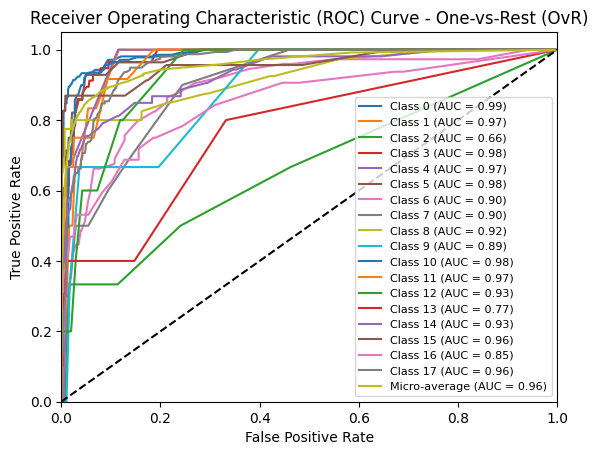

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=range(len(clf.classes_)))

# Calculate the predicted probabilities for each class
y_pred_prob = clf.predict_proba(X_test)

# Compute the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(clf.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot the ROC curve for each class
plt.figure()
for i in range(len(clf.classes_)):
    plt.plot(fpr[i], tpr[i], label='Class {0} (AUC = {1:.2f})'.format(i, roc_auc[i]))

# Plot the micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, label='Micro-average (AUC = {0:.2f})'.format(roc_auc_micro))

# Plot the random guessing curve
plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - One-vs-Rest (OvR)')

# Modify legend properties
legend = plt.legend(loc='lower right', prop={'size': 8})
for text in legend.get_texts():
    text.set_fontsize(8)

plt.show()

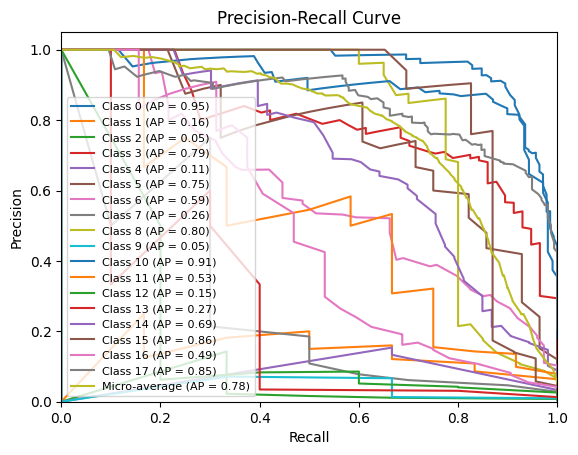

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=range(len(clf.classes_)))

# Calculate the predicted probabilities for each class
y_pred_prob = clf.predict_proba(X_test)

# Compute precision and recall for each class
precision = dict()
recall = dict()
average_precision = dict()

for i in range(len(clf.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_prob[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_prob[:, i])

# Compute micro-average precision-recall curve and AUC
precision_micro, recall_micro, _ = precision_recall_curve(y_test_bin.ravel(), y_pred_prob.ravel())
average_precision_micro = average_precision_score(y_test_bin, y_pred_prob, average="micro")

# Plot the precision-recall curve for each class
plt.figure()
for i in range(len(clf.classes_)):
    plt.plot(recall[i], precision[i], label='Class {0} (AP = {1:.2f})'.format(i, average_precision[i]))

# Plot the micro-average precision-recall curve
plt.plot(recall_micro, precision_micro, label='Micro-average (AP = {0:.2f})'.format(average_precision_micro))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left', prop={'size': 8})

# Modify legend properties
legend = plt.legend(loc='lower left', prop={'size': 8})
for text in legend.get_texts():
    text.set_fontsize(8)

plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.81      0.87       124
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         7
           3       0.71      0.88      0.79        52
           4       0.00      0.00      0.00         2
           5       0.84      0.61      0.71        44
           6       0.54      0.46      0.50        69
           7       0.00      0.00      0.00         7
           8       0.93      0.82      0.87        50
           9       0.00      0.00      0.00         4
          10       0.66      0.97      0.79       130
          11       1.00      0.33      0.50        12
          12       0.00      0.00      0.00         4
          13       1.00      0.17      0.29         6
          14       0.77      0.53      0.63        51
          15       1.00      0.61      0.76        31
          16       1.00      0.17      0.30        23
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# centroids


In [ ]:
# mean centroids
df = pd.DataFrame(X_train)
df['label'] = y_train

# Group the feature matrix by label and compute the mean of each group
centroids = df.groupby('label').mean()

# Convert the centroids to numpy array
centroids = np.array(centroids)

# Print the shape of the centroids array
print(f"Centroids shape: {centroids.shape}")

Centroids shape: (18, 7844)


In [ ]:
from sklearn.metrics.pairwise import cosine_distances

# Calculate the cosine distance between each feature vector in X_test and each centroid
distances = cosine_distances(X_test, centroids)

# Get the indices of the closest centroid for each feature vector in X_test
closest_ids = np.argmin(distances, axis=1)

# Calculate the accuracy
accuracy = np.mean(closest_ids == y_test)

# Print the accuracy as a percentage
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 46.40%


In [ ]:
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics import classification_report

# Calculate the cosine distance between each feature vector in X_test and each centroid
distances = cosine_distances(X_test, centroids)

# Get the indices of the closest centroid for each feature vector in X_test
closest_ids = np.argmin(distances, axis=1)

# Calculate the accuracy
accuracy = np.mean(closest_ids == y_test)

# Generate the classification report
report = classification_report(y_test, closest_ids)

# Print the accuracy as a percentage
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print the classification report
print("Classification Report:")
print(report)

Accuracy: 46.40%
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.56      0.70       124
           1       0.05      0.20      0.08         5
           2       0.06      0.57      0.10         7
           3       0.69      0.38      0.49        52
           4       0.00      0.00      0.00         2
           5       0.62      0.45      0.53        44
           6       0.42      0.39      0.41        69
           7       0.08      0.14      0.11         7
           8       0.90      0.56      0.69        50
           9       0.04      0.25      0.06         4
          10       0.74      0.42      0.53       130
          11       0.35      0.58      0.44        12
          12       0.00      0.00      0.00         4
          13       0.06      0.50      0.10         6
          14       0.66      0.37      0.48        51
          15       0.55      0.68      0.61        31
          16       0.15      0.43      0.